In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%load_ext autoreload
%autoreload 2
import matplotlib.style as mplstyle

mplstyle.use(["ggplot", "fast"])

plt.rcParams.update({
    'font.size': 16,          
    'axes.titlesize': 18,     
    'axes.labelsize': 16,   
    'xtick.labelsize': 16,  
    'ytick.labelsize': 16,
    'legend.fontsize': 14,    
    'figure.titlesize': 20,   
})

In [2]:
n = 1500
x = np.linspace(-1, 1, n)
x = x.reshape(-1, 1)

y = runge_function(x) + np.random.normal(0, 0.1, (n,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2018)
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

X_mean = X_train.mean(axis=0)
X_train = (X_train - X_mean)
X_test  = (X_test - X_mean)


KeyboardInterrupt: 

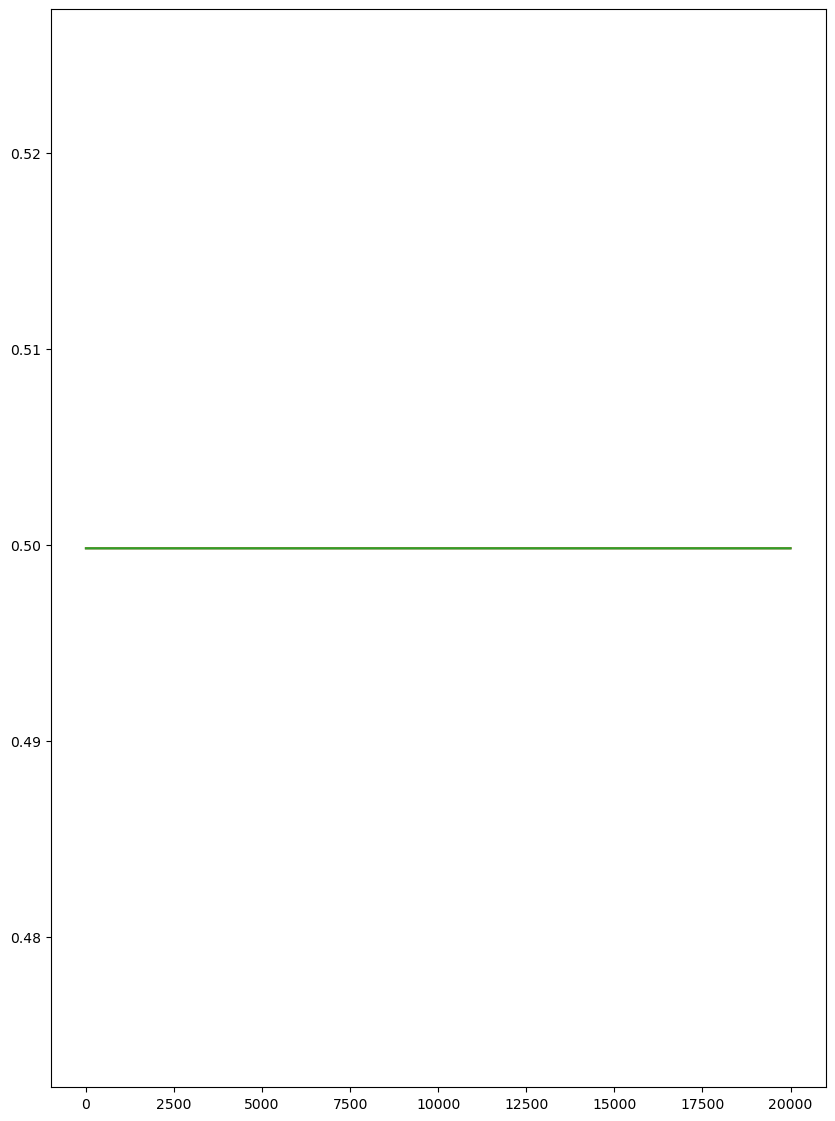

In [4]:
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
node_analysis = [5, 10, 20, 40, 80]
mses = np.zeros((len(learning_rate), len(node_analysis)))
fig, ax = plt.subplots(figsize=(10,14))
for i,h in enumerate(learning_rate):
    for j,k in enumerate(node_analysis):
        reg_nn_gd = NeuralNetwork(1, [k, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
        reg_nn_gd.train(X_train, y_train, epochs=20000, learning_rate=h)
        y_pred_nn_gd = reg_nn_gd._feed_forward(X_test)
        mse_val = reg_nn_gd.cost(y_test, y_pred_nn_gd)
        mses[i, j] = mse_val
        if k == 5 or k == 80:
            ax.plot(reg_nn_gd.get_info()['Cost_history'], label=f"LR: {h}, Layers: {k}")
plt.legend()
plt.show()

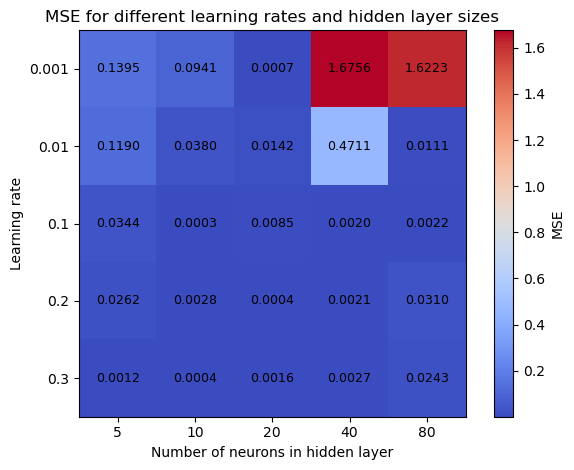

In [ ]:
plt.imshow(mses, cmap='coolwarm', interpolation='nearest')
plt.xticks(ticks=np.arange(len(node_analysis)), labels=node_analysis)
plt.yticks(ticks=np.arange(len(learning_rate)), labels=learning_rate)
plt.xlabel("Number of neurons in hidden layer")
plt.ylabel("Learning rate")
plt.colorbar(label="MSE")
plt.title("MSE for different learning rates and hidden layer sizes")

# === Add text labels (the key part) ===
for i in range(len(learning_rate)):
    for j in range(len(node_analysis)):
        plt.text(
            j, i, f"{mses[i, j]:.4f}",  # format to 3 decimals
            ha='center', va='center', color='black', fontsize=9
        )

plt.tight_layout()
plt.show()

In [231]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

theta = np.linalg.pinv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
y_pred_OLS = X_test_poly @ theta
sort_idx = np.argsort(X_test[:,0])
X_sort = X_test[sort_idx]
y_sort = y_test[sort_idx]
y_pred_OLS_sort = y_pred_OLS[sort_idx]

In [232]:
reg_nn_gd_1layer = NeuralNetwork(1, [50, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
reg_nn_gd_2layer = NeuralNetwork(1, [50, 100, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)

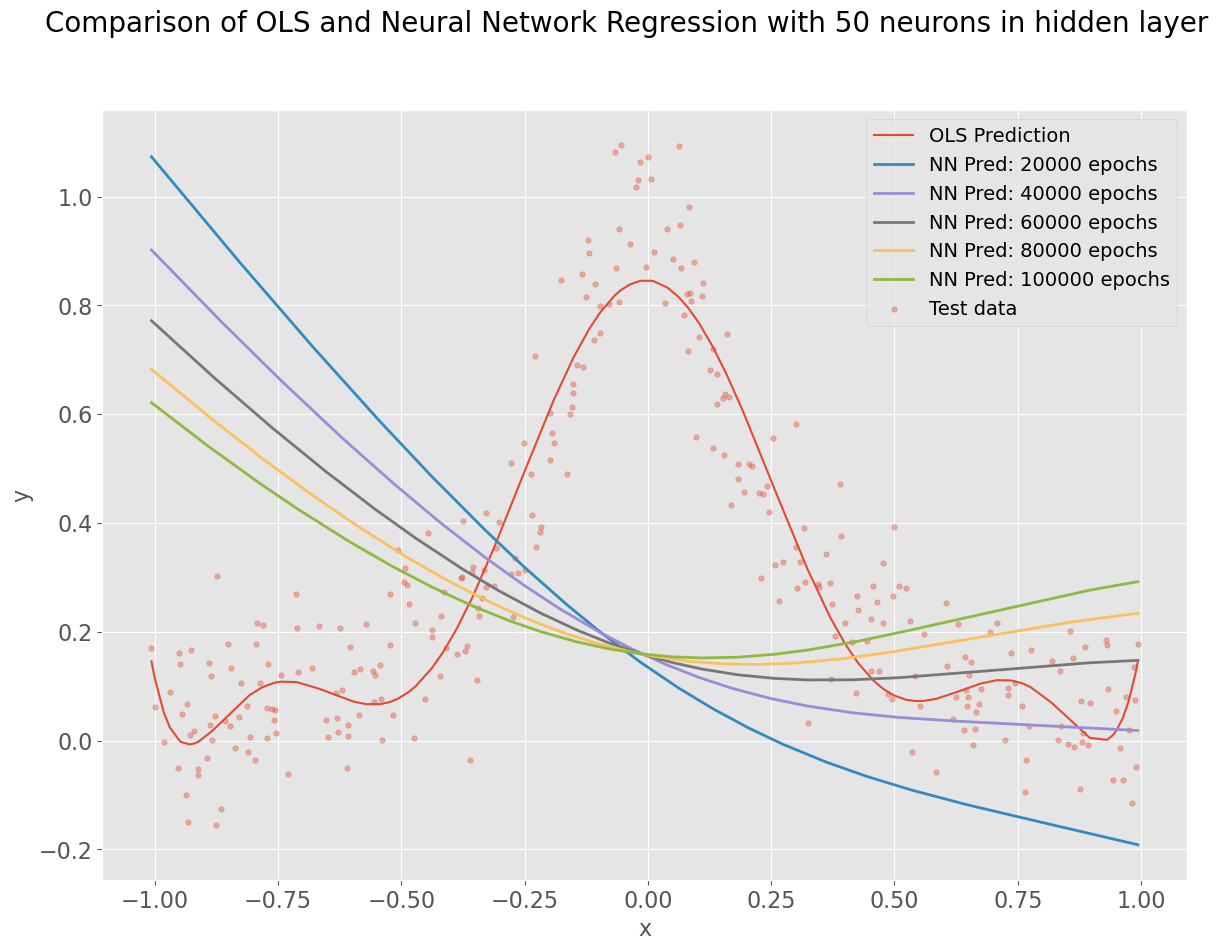

In [233]:
epochs = 20000
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(X_sort,y_pred_OLS_sort,  label="OLS Prediction")


for i in range(5):
    reg_nn_gd_1layer.train(X_train, y_train, epochs=epochs, learning_rate=0.01)
    y_pred_nn_gd = reg_nn_gd_1layer._feed_forward(X_test)[sort_idx]
    ax.plot(X_sort, y_pred_nn_gd, label=f"NN Pred: {(i+1)*epochs} epochs", linewidth=2)
ax.scatter(X_test, y_test, label="Test data", alpha = 0.4, s=15)
fig.suptitle("Comparison of OLS and Neural Network Regression with 50 neurons in hidden layer")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

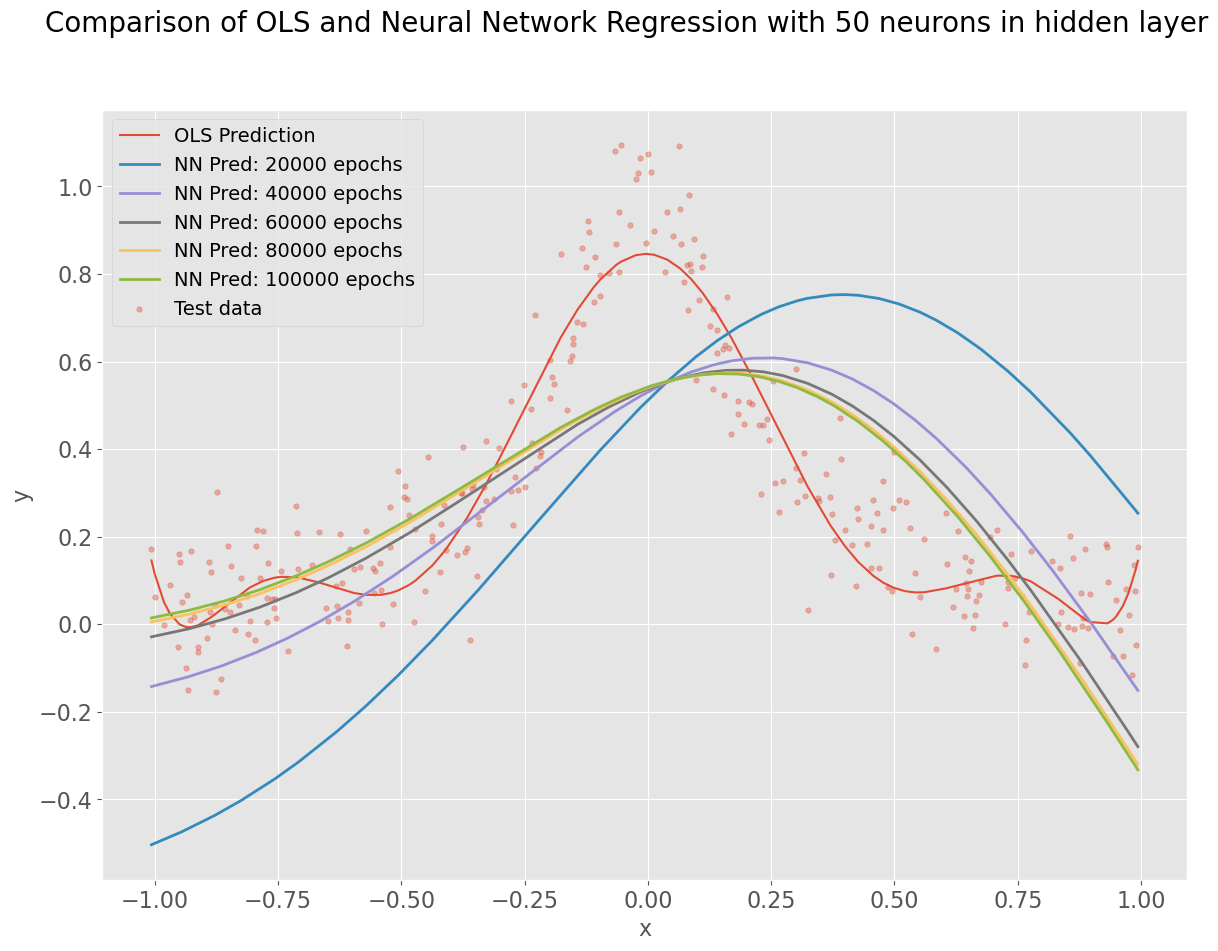

In [234]:
epochs = 20000
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(X_sort,y_pred_OLS_sort,  label="OLS Prediction")


for i in range(5):
    reg_nn_gd_2layer.train(X_train, y_train, epochs=epochs, learning_rate=0.01)
    y_pred_nn_gd = reg_nn_gd_2layer._feed_forward(X_test)[sort_idx]
    ax.plot(X_sort, y_pred_nn_gd, label=f"NN Pred: {(i+1)*epochs} epochs", linewidth=2)
ax.scatter(X_test, y_test, label="Test data", alpha = 0.4, s=15)
fig.suptitle("Comparison of OLS and Neural Network Regression with 50 neurons in hidden layer")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()


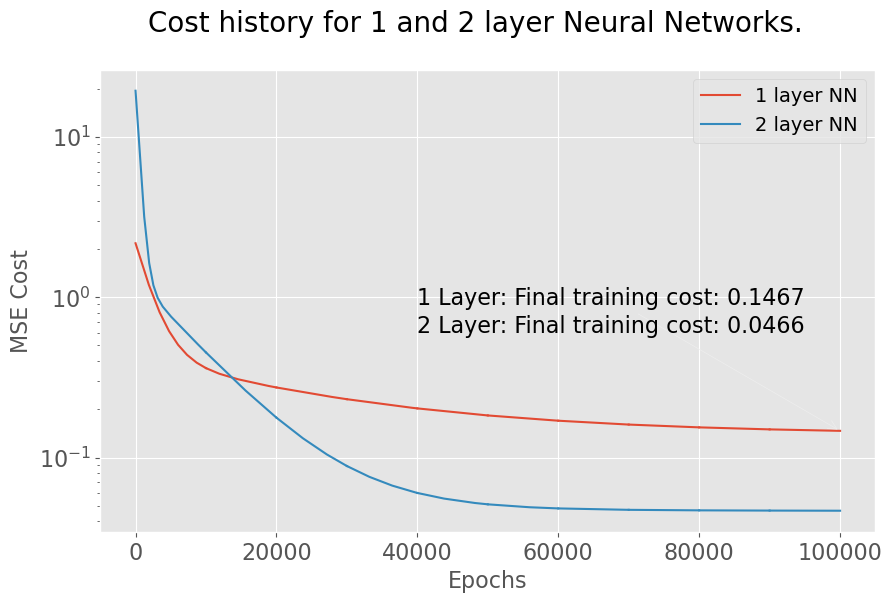

In [235]:
# Cost histories.
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(reg_nn_gd_1layer.get_info()['Cost_history'], label="1 layer NN")
ax.plot(reg_nn_gd_2layer.get_info()['Cost_history'], label="2 layer NN") 
ax.annotate(f"1 Layer: Final training cost: {reg_nn_gd_1layer.get_info()['Cost_history'][-1]:.4f}", 
            xy=(len(reg_nn_gd_1layer.get_info()['Cost_history'])-1, reg_nn_gd_1layer.get_info()['Cost_history'][-1]), 
            xytext=(len(reg_nn_gd_1layer.get_info()['Cost_history'])-60000, reg_nn_gd_1layer.get_info()['Cost_history'][-1]+0.75),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate(f"2 Layer: Final training cost: {reg_nn_gd_2layer.get_info()['Cost_history'][-1]:.4f}", 
            xy=(len(reg_nn_gd_2layer.get_info()['Cost_history'])-1, reg_nn_gd_2layer.get_info()['Cost_history'][-1]), 
            xytext=(len(reg_nn_gd_2layer.get_info()['Cost_history'])-60000, reg_nn_gd_2layer.get_info()['Cost_history'][-1]+0.55)
            )
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE Cost")
ax.set_yscale("log")
fig.suptitle("Cost history for 1 and 2 layer Neural Networks.")
ax.legend()




0.1501256381433979 0.04228108713328764 0.012727642902894777


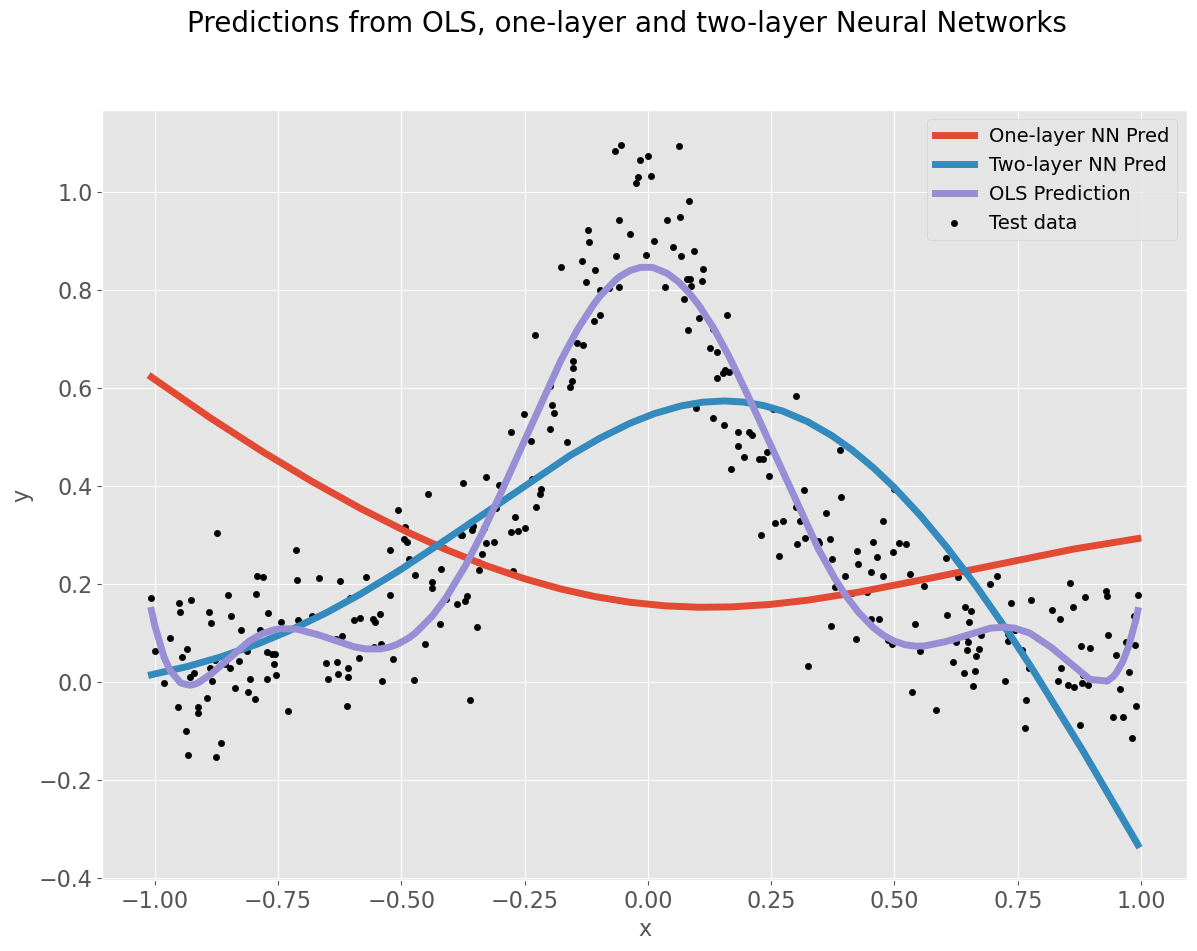

In [236]:
fig, ax = plt.subplots(figsize=(14,10))

y_pred_nn_gd_1layer = reg_nn_gd_1layer._feed_forward(X_test)
y_pred_nn_gd_2layer = reg_nn_gd_2layer._feed_forward(X_test)

ax.plot(X_sort, y_pred_nn_gd_1layer[sort_idx], label=f"One-layer NN Pred", linewidth=5)
ax.plot(X_sort, y_pred_nn_gd_2layer[sort_idx], label=f"Two-layer NN Pred", linewidth=5)
ax.plot(X_sort,y_pred_OLS_sort,  label="OLS Prediction", linewidth=5)
ax.scatter(X_sort, y_sort,label="Test data", color="black", s=20)
fig.suptitle("Predictions from OLS, one-layer and two-layer Neural Networks")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

print(mse(y_test, y_pred_nn_gd_1layer), mse(y_test, y_pred_nn_gd_2layer), mse(y_test, y_pred_OLS))

In [237]:
lrs = [0.001, 0.01, 0.1, 0.2, 0.3,0.4, 0.5, 1.0, 1.5, 2.0]
mses_1_test = []
mses_1_train = []
#fig, ax = plt.subplots(figsize=(13, 10))
#fig.suptitle("Change in NN Prediction with different Learning Rates\n and cost history of training")
for i in lrs:
    
    reg_1layer_lr = NeuralNetwork(1, [50, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
    reg_1layer_lr.train(X_train, y_train, epochs=10000, learning_rate=i)
    y_pred_nn_gd = reg_1layer_lr._feed_forward(X_test)
    cost = reg_1layer_lr.get_info()['Cost_history']
    mses_1_test.append(mse(y_pred_nn_gd, y_test))
    mses_1_train.append(cost[-1])
   
#     ax.plot(cost, label=f"LR: {i}")
# ax.set_xlabel("Epochs")
# ax.set_ylabel("Cost")
# ax.legend()

# plt.tight_layout()
# plt.show()
   

In [238]:
mses_2_test = []
mses_2_train = []
#fig, ax = plt.subplots(figsize=(13, 10))
#fig.suptitle("Change in NN Prediction with different Learning Rates\n and cost history of training")
for i in lrs:
    
    reg_2layer_lr = NeuralNetwork(1, [50, 100, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid),derivate(sigmoid), derivate(identity)], mse, mse_der)
    reg_2layer_lr.train(X_train, y_train, epochs=10000, learning_rate=i)
    y_pred_nn_gd = reg_2layer_lr._feed_forward(X_test)
    cost = reg_2layer_lr.get_info()['Cost_history']
    mses_2_test.append(mse(y_pred_nn_gd, y_test))
    mses_2_train.append(cost[-1])
    

#     ax.plot(cost, label=f"LR: {i}")
# ax.set_xlabel("Epochs")
# ax.set_ylabel("Cost")
# ax.legend()

# plt.tight_layout()
# plt.show()

0.012727642902894777


[np.float64(3.9150340444050395),
 np.float64(0.433027216566796),
 np.float64(0.04228142113578926),
 np.float64(0.041726789584273206),
 np.float64(0.04117107728796123),
 np.float64(0.04065407552521739),
 np.float64(0.040167033239702915),
 np.float64(0.03804099046713157),
 np.float64(0.036274853212737955),
 np.float64(0.03480212656791197)]

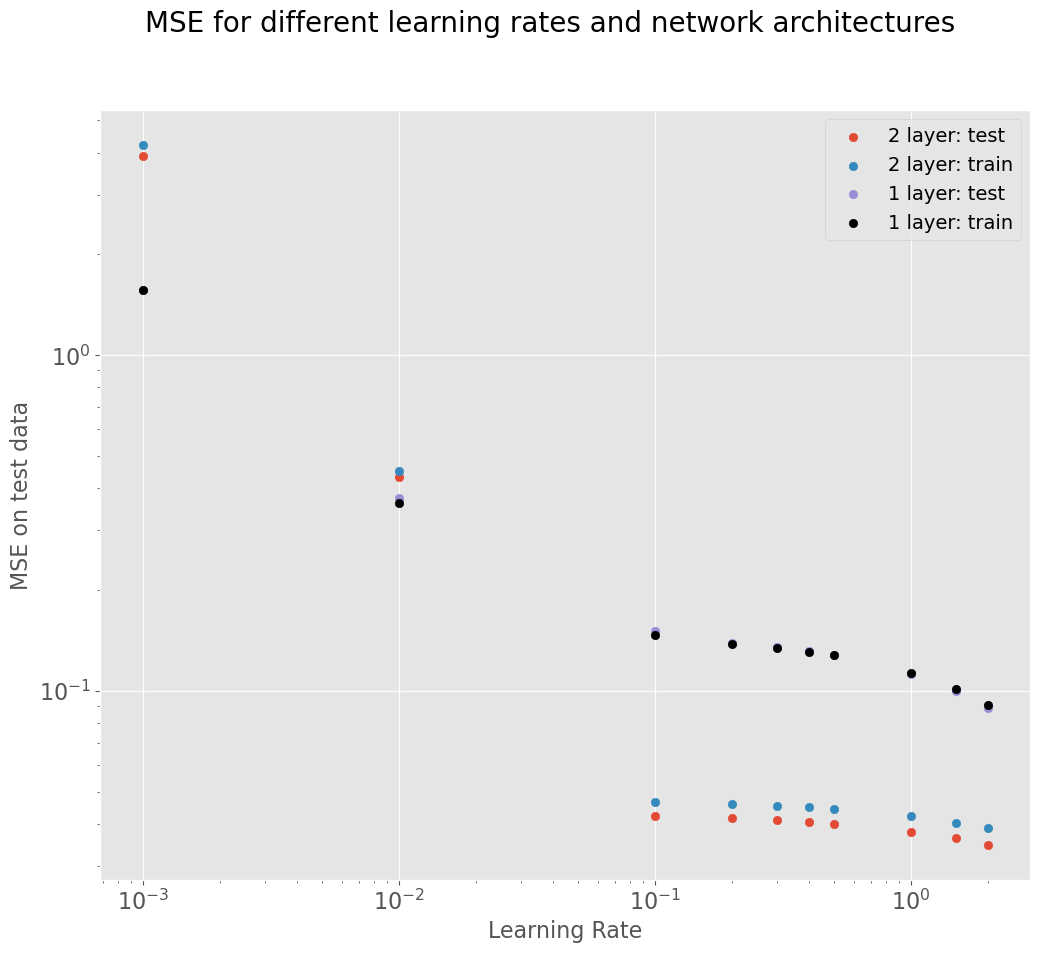

In [243]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(lrs, mses_2_test, label="2 layer: test")
ax.scatter(lrs, mses_2_train, label="2 layer: train")
ax.scatter(lrs, mses_1_test, label = "1 layer: test")
ax.scatter(lrs, mses_1_train, label = "1 layer: train", color="black")
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("MSE on test data")
fig.suptitle("MSE for different learning rates and network architectures")
print(mse(y_test, y_pred_OLS))

mses_2_test

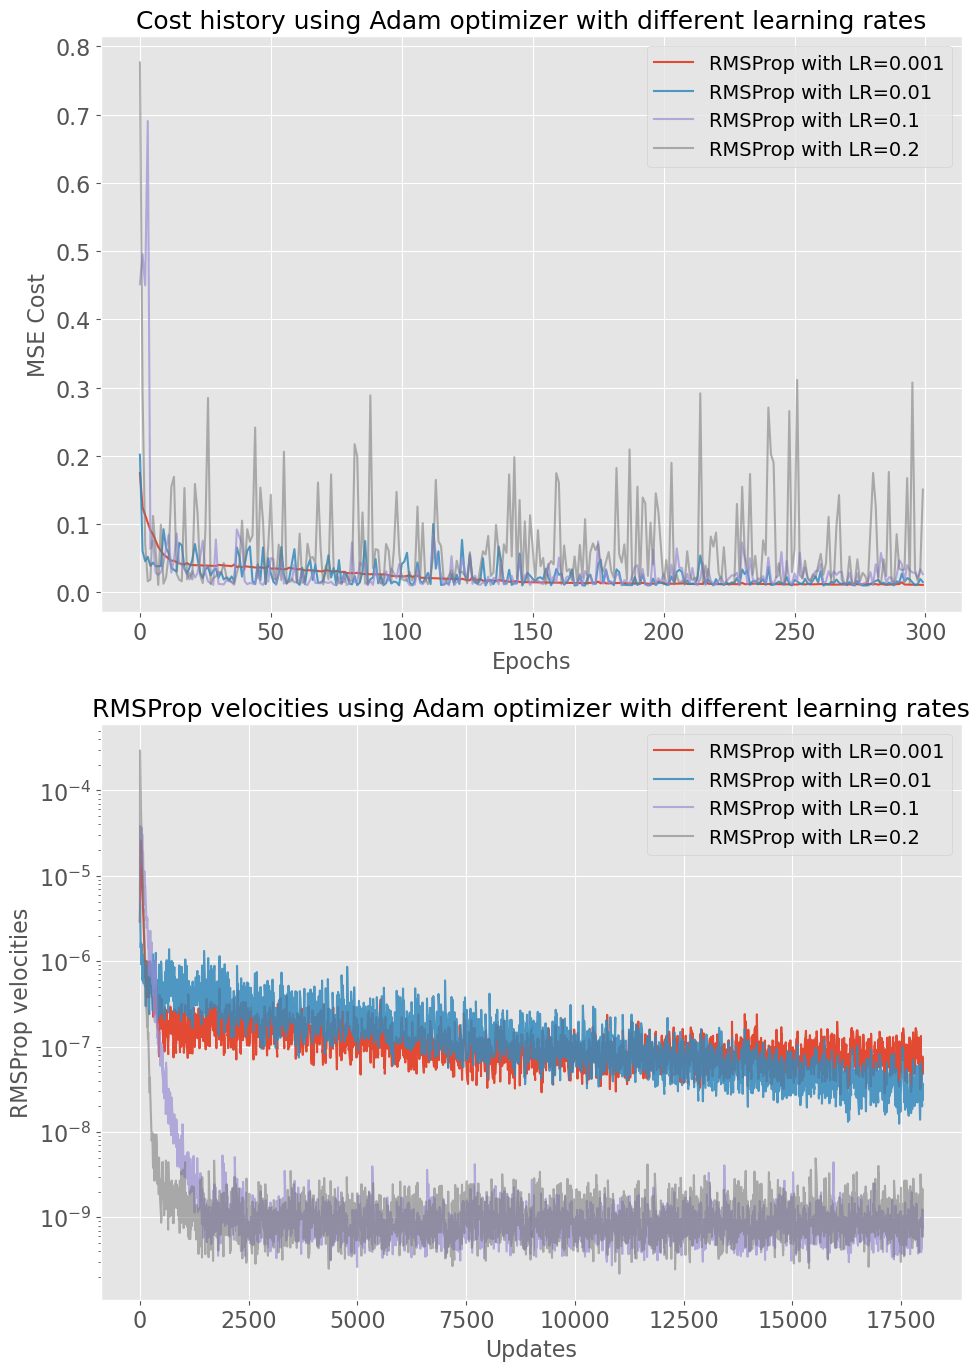

In [ ]:
l = ["gd", "RMSProp","Adam"]
lr = [0.001, 0.01, 0.1, 0.2]
mse_test = []
mse_train = []
fig, ax = plt.subplots(2,1,figsize=(10,14))
for j in l:
    a = 1
    for i in lr:
        reg_ffnn = NeuralNetwork(1, [50, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
        reg_ffnn.train_SGD(X_train, y_train, epochs=300, learning_rate=i, batch_size=20, optimizer=j)
        mse_test.append(mse(y_test, reg_ffnn._feed_forward(X_test)))
        mse_train.append(reg_ffnn.get_info()['Cost_history'][-1])
        if j == "RMSProp":
            ax[0].plot(reg_ffnn.get_info()['Cost_history'], label=f"{j} with LR={i}", alpha=a)
            ax[1].plot(reg_ffnn.get_info()['RMSProp_velocities'], label=f"{j} with LR={i}", alpha=a)
            a -= 0.15
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE Cost")
ax[0].set_title(f"Cost history using RMSProp optimizer with different learning rates")
ax[1].set_xlabel("Updates")
ax[1].set_ylabel("RMSProp velocities")
ax[1].set_title(f"RMSProp velocities using RMSProp optimizer with different learning rates")
ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()


In [4]:
print("test \n")
for i in mse_test:
    print(f"{i:.4f}")
print("\ntrain\n")
for i in mse_train:
    print(f"{i:.4f}")

test 

0.1501
0.1120
0.0390
0.0362
0.0111
0.0155
0.0280
0.1581
0.0114
0.0156
0.0181
0.0110

train

0.1416
0.1065
0.0407
0.0382
0.0111
0.0153
0.0269
0.1507
0.0113
0.0166
0.0186
0.0110


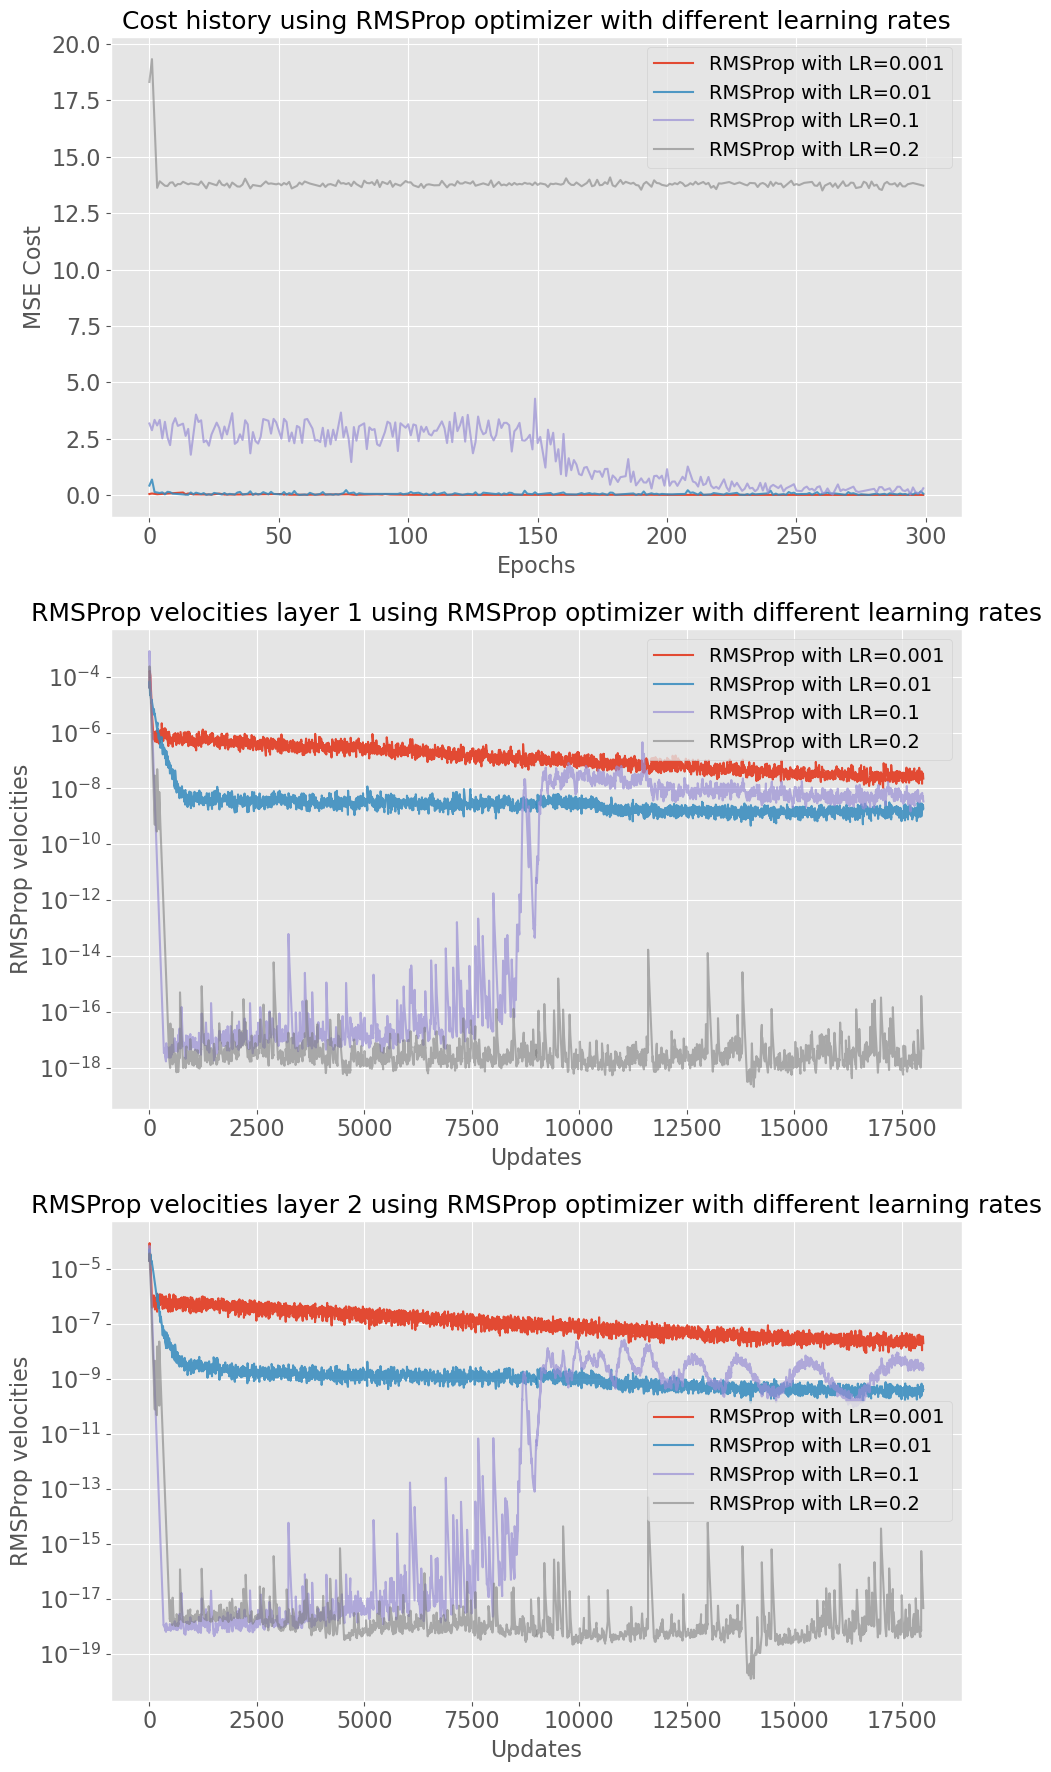

In [30]:
l = ["gd", "RMSProp","Adam"]
lr = [0.001, 0.01, 0.1, 0.2]
mse_test_tl = []
mse_train_tl = []
fig, ax = plt.subplots(3,1,figsize=(10,18))
for j in l:
    a = 1
    for i in lr:
        reg_ffnn = NeuralNetwork(1, [50, 100, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid),derivate(sigmoid), derivate(identity)], mse, mse_der)
        reg_ffnn.train_SGD(X_train, y_train, epochs=300, learning_rate=i, batch_size=20, optimizer=j)
        mse_test_tl.append(mse(y_test, reg_ffnn._feed_forward(X_test)))
        mse_train_tl.append(reg_ffnn.get_info()['Cost_history'][-1])
        if j == "RMSProp":
            ax[0].plot(reg_ffnn.get_info()['Cost_history'], label=f"{j} with LR={i}", alpha=a)
            ax[1].plot(reg_ffnn.get_info()['RMSProp_velocities_layer1'], label=f"{j} with LR={i}", alpha=a)
            ax[2].plot(reg_ffnn.get_info()['RMSProp_velocities_layer2'], label=f"{j} with LR={i}", alpha=a)
            a -= 0.15
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE Cost")
ax[0].set_title(f"Cost history using RMSProp optimizer with different learning rates")
ax[1].set_xlabel("Updates")
ax[1].set_ylabel("RMSProp velocities")
ax[1].set_title(f"RMSProp velocities layer 1 using RMSProp optimizer with different learning rates")
ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()
ax[2].set_xlabel("Updates")
ax[2].set_ylabel("RMSProp velocities")
ax[2].set_title(f"RMSProp velocities layer 2 using RMSProp optimizer with different learning rates")
ax[2].set_yscale("log")
ax[2].legend()
plt.tight_layout()
plt.show()

In [31]:
for i in mse_test_tl:
    print(f"{i:.4f}")
print("\ntrain\n")
for i in mse_train_tl:
    print(f"{i:.4f}")

0.0458
0.0407
0.0265
0.0187
0.0111
0.0641
0.2960
13.7282
0.0103
0.0111
0.0959
0.0278

train

0.0482
0.0432
0.0279
0.0193
0.0113
0.0659
0.3048
13.7189
0.0105
0.0115
0.0972
0.0252
